In [1]:
import numpy as np
from scipy import optimize
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Utility w/ N_bar

In [90]:
# utility function
def utility(x):
    return np.sqrt(x)

def p(N_bar):
    return np.log(1000/(N_bar+1))

def ransom(N, N_bar):
    return 10000/(N_bar+1) + 2000/(N+1) - 1000

# insurance premium, P
def premium(p, R):
    return p*R

# probability of death, q
def q(N, N_bar):
    return np.log((N / 150) + (10/N_bar))

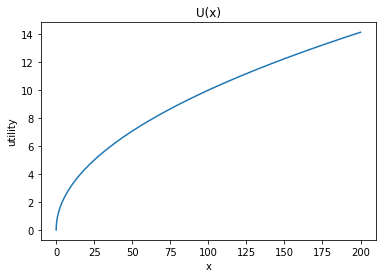

In [91]:
# utility function properties

x = np.arange(0, 200, 0.01)
u_y = utility(x)
plt.plot(x, u_y)
plt.title('U(x)')
plt.xlabel('x')
plt.ylabel('utility')
plt.show()

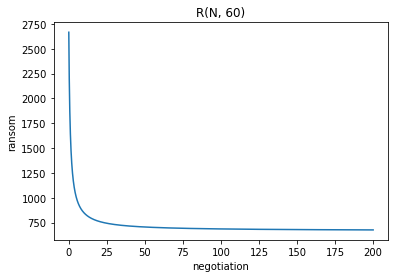

In [92]:
# ransom function properties
# 

r_y = ransom(x, 5)
plt.plot(x, r_y)
plt.title('R(N, 60)')
plt.ylabel('ransom')
plt.xlabel('negotiation')
# plt.axis([0, 500, 90, 100])
plt.show()

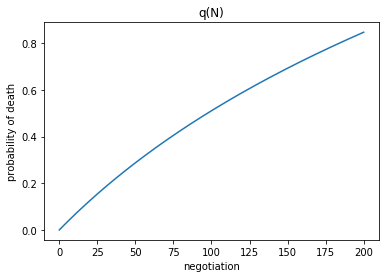

In [93]:
# death function properties

d_y = q(x, 10)
plt.plot(x, d_y)
plt.title('q(N)')
plt.xlabel('negotiation')
plt.ylabel('probability of death')
plt.show()


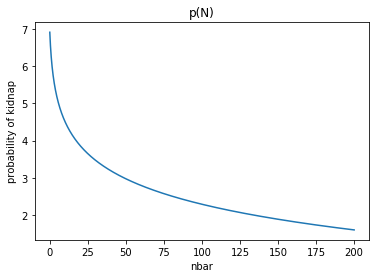

In [94]:
k_y = p(x)
plt.plot(x, k_y)
plt.title('p(N)')
plt.xlabel('nbar')
plt.ylabel('probability of kidnap')
plt.show()


In [95]:
# expected utility function with p, W, D, K, N, N_bar as exogenous variables
xvals = np.arange(0, 500, .01)

def expected_utility(W, D, K, N, N_bar):
    P = premium(p(N_bar), ransom(N, N_bar))
    return (1-p(N_bar))*utility(W-P) + \
            p(N_bar)*q(N, N_bar)*utility(W-P-D) + \
            p(N_bar)*(1-q(N, N_bar))*utility(W-P-K)

In [114]:
# setting exogenous variables
# p = .05
W = 100000
D = 9000
K = 3000
N_bar = 8

# function of N
def U(N, N_bar):
    return expected_utility(W, D, K, N, N_bar)

In [115]:
U(6, 5)

247.77660193345531

[ 276.35753544  276.52211926  276.68331891 ...,  225.02441173  225.02370138
  225.02299103]


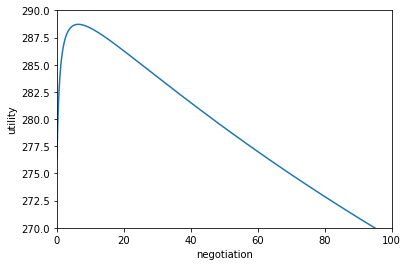

In [116]:
yvals = U(xvals, N_bar)
print(yvals)
plt.plot(xvals, yvals)
plt.xlabel('negotiation')
plt.ylabel('utility')
plt.axis([0, 100, 270, 290])
plt.show()

In [118]:
# negotiation yielding the max utility
i = np.nanargmax(yvals)
max_negotiation = xvals[i]

print 'max utility =', yvals[i]
print 'max negotiation=', max_negotiation
print 'n_bar=', N_bar

max utility = 288.714097075
max negotiation= 6.39
n_bar= 8


In [130]:
# create dataset with N, N bar values
# df = pd.DataFrame([[1, 2], [3, 4]], columns=list('NB'))
def solve_fixed_point(range=[0.01, 50]):
    # start from array, iterate through and find opt N
    # generate table
    result = []
    Nbars = np.arange(range[0], range[1], 0.01)
    Ns = np.arange(0, 250, .01)
    for Nbar in Nbars:
        EUs = U(Ns, Nbar)
        i = np.nanargmax(EUs)
        max_N = Ns[i]
        result.append({'n': max_N, 'nbar': Nbar})
    return result

In [131]:
optimal_pairs = solve_fixed_point()
optimal_pairs

[{'n': 249.99000000000001, 'nbar': 0.01},
 {'n': 249.99000000000001, 'nbar': 0.02},
 {'n': 249.99000000000001, 'nbar': 0.029999999999999999},
 {'n': 235.80000000000001, 'nbar': 0.040000000000000001},
 {'n': 205.99000000000001, 'nbar': 0.050000000000000003},
 {'n': 184.19, 'nbar': 0.060000000000000005},
 {'n': 167.39000000000001, 'nbar': 0.069999999999999993},
 {'n': 153.95000000000002, 'nbar': 0.080000000000000002},
 {'n': 142.90000000000001, 'nbar': 0.089999999999999997},
 {'n': 133.62, 'nbar': 0.099999999999999992},
 {'n': 125.69, 'nbar': 0.11},
 {'n': 118.82000000000001, 'nbar': 0.12},
 {'n': 112.8, 'nbar': 0.13},
 {'n': 107.47, 'nbar': 0.14000000000000001},
 {'n': 102.71000000000001, 'nbar': 0.15000000000000002},
 {'n': 98.430000000000007, 'nbar': 0.16},
 {'n': 94.560000000000002, 'nbar': 0.17000000000000001},
 {'n': 91.040000000000006, 'nbar': 0.18000000000000002},
 {'n': 87.820000000000007, 'nbar': 0.19},
 {'n': 84.870000000000005, 'nbar': 0.20000000000000001},
 {'n': 82.14000000

In [142]:
test = np.array([])
np.append(test, [1])
np.append(test, [2])
test

array([], dtype=float64)

In [132]:
import pandas as pd

In [134]:
df = pd.DataFrame(data=optimal_pairs)

In [135]:
df

,n,nbar
0,249.99,0.01
1,249.99,0.02
2,249.99,0.03
3,235.80,0.04
4,205.99,0.05
5,184.19,0.06
6,167.39,0.07
7,153.95,0.08
8,142.90,0.09
9,133.62,0.10


In [147]:
df.columns[0:]

Index([u'n', u'nbar'], dtype='object')

In [148]:
n_stars = df.as_matrix(columns=df.columns[0:1])

array([[ 249.99],
       [ 249.99],
       [ 249.99],
       ..., 
       [   2.05],
       [   2.04],
       [   2.04]])

In [ ]:
plt.plot(np.arange(0.01, 50, 0.01), n_stars)
plt.xlabel('nbar')
plt.ylabel('nstar')
plt.axis([0, 100, 270, 290])
plt.show()

# Utility w/ N_bar

ImportError: cannot import name exceptions

In [ ]:

# literature review-- if another student were to pick up trail, write summary of lit review
# get data for explanatory stuff